In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time
start = time.time()
#read data in chunks of 1 million rows at a time
chunk1 = pd.read_csv('I:\\verisetleri1\\USB-IDS1\\X_train.csv',chunksize=1000000)
chunk2 = pd.read_csv('I:\\verisetleri1\\USB-IDS1\\X_test.csv',chunksize=1000000)
chunk3 = pd.read_csv('I:\\verisetleri1\\USB-IDS1\\y_test.csv',chunksize=1000000)
chunk4 = pd.read_csv('I:\\verisetleri1\\USB-IDS1\\y_train.csv',chunksize=1000000)


x_train = pd.concat(chunk1)
x_test  = pd.concat(chunk2)
y_train = pd.concat(chunk3)
y_test  = pd.concat(chunk4)

X_train= x_train.drop(['Unnamed: 0'], axis=1)
X_test= x_test.drop(['Unnamed: 0'], axis=1)
Y_train= y_train.drop(['Unnamed: 0'], axis=1)
Y_test= y_test.drop(['Unnamed: 0'], axis=1)

In [29]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
import keras
from keras.layers.convolutional import Conv1D 
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
import seaborn as sns
import plotly.express as px

In [ ]:
plt.figure(figsize=(18,18))
data_corr=result.corr()
sns.heatmap(data_corr, cmap = 'coolwarm')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam
import keras
from keras.layers.convolutional import Conv1D,MaxPooling1D
from keras.layers import LSTM
from keras.layers import Dense,Dropout
from keras.layers import Flatten

In [32]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
X_resample = X_resample.to_numpy()

In [ ]:
X_test.shape

In [ ]:
from keras.utils.np_utils import to_categorical
y_train1 = to_categorical(Y_train, num_classes=2)
y_test1 = to_categorical(Y_test, num_classes=2)

In [33]:
### reshape input data to LSTM format [samples, time_steps, features]
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(f"shape of X_train:", X_train_lstm.shape)
print(f"shape of X_test:", X_test_lstm.shape)

shape of X_train: (3369368, 1, 6)
shape of X_test: (1444027, 1, 6)
shape of X_train: (3369368, 1, 6)
shape of X_test: (1444027, 1, 6)


In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LSTM, Dropout, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import backend as K

num_folds = 5
verbosity = 1
n_classes = 2
n_features = X_train_lstm.shape[2]
activation = 'relu'
batch_size = 1024
dropout_rate = 0.2
epochs = 500
kernel_initializer = 'normal'
lstm_units_1 = 50
lstm_units_2 = 30
lstm_units_3 = 50
optimizer = 'Adamax'


callback_early_stopping = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.001)

model = Sequential()
model.add(LSTM(units=lstm_units_1, activation=activation, kernel_initializer=kernel_initializer, return_sequences=True, input_shape=(timesteps, features)))
model.add(Dropout(dropout_rate))
model.add(LSTM(units=lstm_units_2, activation=activation, kernel_initializer=kernel_initializer, return_sequences=True))
model.add(Dropout(dropout_rate))
model.add(LSTM(units=lstm_units_3, activation=activation, kernel_initializer=kernel_initializer))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='softmax'))

 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


print('------------------------------------------------------------------------')
print('Training...')

history = model.fit(X_train_lstm, y_train_pca, validation_split=0.2, 
                    callbacks=[callback_early_stopping, callback_reduce_lr],
                    batch_size=batch_size,
                    epochs=no_epochs,
                    verbose=verbosity)

# Değerlendirme metriklerini hesapla
true_labels = y_test

predictions = model.predict(X_test_lstm)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')

print(f'Accuracy: {accuracy:.5f}, Precision: {precision:.5f}, Recall: {recall:.5f}')

------------------------------------------------------------------------
Training...
------------------------------------------------------------------------
Training...
Epoch 1/500
Epoch 1/500
2633/2633 [==============================] - 61s 18ms/step - loss: 0.0196 - accuracy: 0.9977 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 2/500
2633/2633 [==============================] - 45s 17ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0010 - val_accuracy: 0.9998
Epoch 3/500
2633/2633 [==============================] - 48s 18ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 9.3269e-04 - val_accuracy: 0.9998
Epoch 4/500
2633/2633 [==============================] - 46s 17ms/step - loss: 9.7874e-04 - accuracy: 0.9998 - val_loss: 7.5650e-04 - val_accuracy: 0.9999
Epoch 5/500
2633/2633 [==============================] - 46s 18ms/step - loss: 8.6535e-04 - accuracy: 0.9998 - val_loss: 7.2900e-04 - val_accuracy: 0.9999
Epoch 6/500
2633/2633 [==============================] - 42s 16

In [36]:
def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance

In [37]:
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from itertools import cycle
def RoC_Curve(y_score, y_resample, labels, title): 
    y_cat = to_categorical(y_resample)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    lw = 2
    # First aggregate all false positive rates
    n_classes = len(labels)
#     print('n_classes:', n_classes)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_cat[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_cat.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(8,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.4f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label=f'ROC curve of class {labels[i]} (area = {roc_auc[i]:0.4f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title, fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [38]:
# predicting on training set
y_train_pred_prob = model.predict(X_train_lstm)
y_test_pred_prob = model.predict(X_test_lstm)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

In [ ]:
y_train_pred_labels = le.inverse_transform(y_train_pred)

In [ ]:
y_resample.shape

In [ ]:
y_train_pred.shape

In [40]:
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()


y_train_pca = le.fit_transform(y_train_pca)

y_test_pca = le.transform(y_test_pca)

labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)

{0: 0, 1: 1}
{0: 0, 1: 1}


In [42]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train_pca)

performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
0,1,0.9999,1,0.9999
1,1,1,1,1


,accuracy,precision,recall,f1_score
0,1,0.9999,1,0.9999
1,1,1,1,1


In [43]:
y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_true_labels = le.inverse_transform(y_test_pca)


In [ ]:
from sklearn.metrics import accuracy_score

print("accuracy score:", metrics.accuracy_score(y_test_true_labels,y_test_pred_labels ))

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_test_pred)
accuracy

In [44]:
performance = multilabel_matrix(y_test_true_labels, y_test_pred_labels, labels=le.classes_)
performance

,accuracy,precision,recall,f1_score
0,1,0.9999,0.9999,0.9999
1,1,1,1,1


,accuracy,precision,recall,f1_score
0,1,0.9999,0.9999,0.9999
1,1,1,1,1


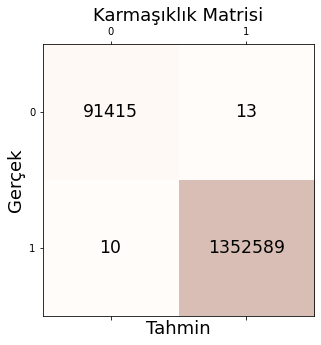

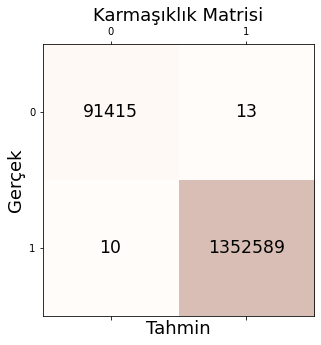

In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test_pca, y_pred=y_test_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Tahmin', fontsize=18)
plt.ylabel('Gerçek', fontsize=18)
plt.title('Karmaşıklık Matrisi', fontsize=18)
plt.show()